## Working on Climate Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
temp =pd.read_csv('data/CDO9875987744593.txt',sep=',',parse_dates=[2],skipinitialspace=True)

In [3]:
temp.columns=temp.columns.str.strip()               #remove whitespaces from column names
tb=temp[['YEARMODA','TEMP','MAX','MIN','PRCP']]     #select only required fields into the table
tb.set_index('YEARMODA',inplace=True)               #index table on the date column

In [4]:
tb.head()

,TEMP,MAX,MIN,PRCP
YEARMODA,,,,
1957-04-13,80.2,91.0,79.0,0.00G
1957-12-31,79.2,88.0,75.0,0.59G
1958-02-05,77.8,82.0*,73.0,0.00G
1958-11-11,79.5,88.0,75.0,0.00I
1961-01-11,77.4,82.0*,72.0,1.73G


In [5]:
p=np.array(tb['PRCP'])
p[:][:3]

array(['0.00G', '0.59G', '0.00G'], dtype=object)

In [6]:
p.resize(16757,1)
p.shape
print(p)

[['0.00G']
 ['0.59G']
 ['0.00G']
 ...
 ['0.00I']
 ['0.00I']
 ['0.00I']]


In [7]:
p[3,0]

'0.00I'

In [8]:
#filter rows with G flag in PRCP col and then extract the value part as integer

tb['PRCP']=tb[tb['PRCP'].str.contains('G')]['PRCP'].str.extract(r'(\d\d)',expand=True).astype(int)

tb.head()   

/home/linn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TEMP,MAX,MIN,PRCP
YEARMODA,,,,
1957-04-13,80.2,91.0,79.0,0.0
1957-12-31,79.2,88.0,75.0,59.0
1958-02-05,77.8,82.0*,73.0,0.0
1958-11-11,79.5,88.0,75.0,NaN
1961-01-11,77.4,82.0*,72.0,73.0


In [9]:
tb.dropna(subset=['PRCP'],inplace=True) # drop all rows where flag is not G
sub=tb.tail(100)                        #select a subset of rows for plotting
sub.head()

/home/linn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,TEMP,MAX,MIN,PRCP
YEARMODA,,,,
2018-05-03,86.9,94.8,81.5,0.0
2018-05-05,83.2,95.4,77.4*,0.0
2018-05-06,82.3,93.2,74.3,8.0
2018-05-07,83.0,92.3,77.4,31.0
2018-05-08,82.2,92.3,77.0*,4.0


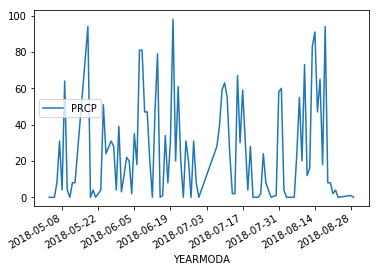

In [10]:
sub.plot.line(y='PRCP')

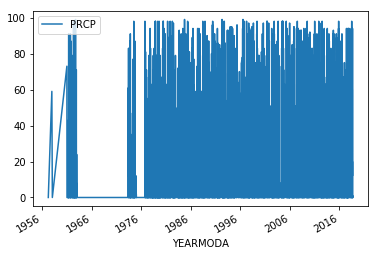

In [11]:
tb.plot.line(y='PRCP')